In [5]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import sys
sys.path.append('C:/Users/mbonney/OneDrive - NRCan RNCan/Projects/UtilityCode/Visualization/Utilities')
import Viz_Utils as vutil

In [19]:
tile_stats = pd.read_csv(r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\High Resolution Snow Dynamics\Fmask_V1\1_1\Tile_stats\tile_stats_1824_v1_1.csv", index_col = 0)
tile_stats = tile_stats.drop(columns = ['smin_18', 'smin_19', 'smin_20', 'smin_21', 'smin_22', 'smin_23', 'smin_24',
                                        'tmax_18', 'tmax_19', 'tmax_20', 'tmax_21', 'tmax_22', 'tmax_23', 'tmax_24',
                                        'rmax_18', 'rmax_19', 'rmax_20', 'rmax_21', 'rmax_22', 'rmax_23', 'rmax_24'])
                                        
tile_stats

,send_l,sstart_f,sper_p,avg_18,avg_19,avg_20,avg_21,avg_22,avg_23,avg_24
0,90.0,335.0,0.000000,210.0,199.0,189.0,200.0,197.0,181.0,178.0
1,90.0,335.0,0.000000,210.0,201.0,199.0,201.0,200.0,190.0,187.0
2,90.0,335.0,0.000000,209.0,200.0,192.0,205.0,197.0,190.0,187.0
3,90.0,335.0,0.000000,208.0,201.0,186.0,190.0,199.0,179.0,182.0
4,90.0,335.0,0.000000,210.0,198.0,188.0,200.0,197.0,181.0,178.0
...,...,...,...,...,...,...,...,...,...,...
3386,NaN,NaN,20.354541,197.0,199.0,199.0,194.0,201.0,196.0,193.0
3387,NaN,NaN,11.178335,200.0,190.0,198.0,194.0,201.0,196.0,195.0
3388,NaN,NaN,7.835338,198.0,202.0,198.0,193.0,198.0,184.0,193.0
3389,NaN,NaN,0.041697,196.0,200.0,192.0,204.0,191.0,194.0,194.0


In [22]:
tiles = r"C:\Users\mbonney\OneDrive - NRCan RNCan\Projects\UtilityData\Study Areas\Canada\TileSystems\60km\canadaFishnet_CanVec_60km_clip.shp"
tiles = gpd.read_file(tiles, engine = 'pyogrio').drop(columns = ['PERCENTAGE', 'Majority_Z', 'Longitude', 'Latitude', 'NALCMS_max', 'sper_p'])
tiles['send_l'] = tile_stats['send_l']
tiles['sstart_f'] = tile_stats['sstart_f']
tiles['sper_p'] = tile_stats['sper_p']
tiles['avg_18'] = tile_stats['avg_18']
tiles['avg_19'] = tile_stats['avg_19']
tiles['avg_20'] = tile_stats['avg_20']
tiles['avg_21'] = tile_stats['avg_21']
tiles['avg_22'] = tile_stats['avg_22']
tiles['avg_23'] = tile_stats['avg_23']
tiles['avg_24'] = tile_stats['avg_24']
tiles

,geometry,send_l,sstart_f,sper_p,avg_18,avg_19,avg_20,avg_21,avg_22,avg_23,avg_24
0,"POLYGON ((1008972.823 -693717.864, 1007578.707...",90.0,335.0,0.000000,210.0,199.0,189.0,200.0,197.0,181.0,178.0
1,"POLYGON ((1055101.994 -724723.511, 1018145.335...",90.0,335.0,0.000000,210.0,201.0,199.0,201.0,200.0,190.0,187.0
2,"POLYGON ((1068972.823 -721970.695, 1068972.823...",90.0,335.0,0.000000,209.0,200.0,192.0,205.0,197.0,190.0,187.0
3,"POLYGON ((1128972.823 -672417.924, 1128972.823...",90.0,335.0,0.000000,208.0,201.0,186.0,190.0,199.0,179.0,182.0
4,"POLYGON ((1006314.847 -664723.511, 1006713.578...",90.0,335.0,0.000000,210.0,198.0,188.0,200.0,197.0,181.0,178.0
...,...,...,...,...,...,...,...,...,...,...,...
3386,"POLYGON ((288972.823 3775276.489, 288972.823 3...",NaN,NaN,20.354541,197.0,199.0,199.0,194.0,201.0,196.0,193.0
3387,"POLYGON ((348972.823 3775276.489, 348972.823 3...",NaN,NaN,11.178335,200.0,190.0,198.0,194.0,201.0,196.0,195.0
3388,"POLYGON ((408972.823 3775276.489, 408972.823 3...",NaN,NaN,7.835338,198.0,202.0,198.0,193.0,198.0,184.0,193.0
3389,"POLYGON ((468972.823 3775276.489, 468972.823 3...",NaN,NaN,0.041697,196.0,200.0,192.0,204.0,191.0,194.0,194.0


# Implausible Snow

In [23]:
tiles['is_len'] = 0

for tile in range(len(tiles)):
    if ((np.isnan(tiles.loc[tile, 'send_l']) == True) | (tiles.loc[tile, 'sper_p'] >= 0.01)):
        tiles.loc[tile, 'is_len'] = 0
    else:
        is_len = (int(tiles.loc[tile, 'sstart_f']) - 7) - (int(tiles.loc[tile, 'send_l']) + 7) - 1
        tiles.loc[tile, 'is_len'] = is_len

tiles

,geometry,send_l,sstart_f,sper_p,avg_18,avg_19,avg_20,avg_21,avg_22,avg_23,avg_24,is_len
0,"POLYGON ((1008972.823 -693717.864, 1007578.707...",90.0,335.0,0.000000,210.0,199.0,189.0,200.0,197.0,181.0,178.0,230
1,"POLYGON ((1055101.994 -724723.511, 1018145.335...",90.0,335.0,0.000000,210.0,201.0,199.0,201.0,200.0,190.0,187.0,230
2,"POLYGON ((1068972.823 -721970.695, 1068972.823...",90.0,335.0,0.000000,209.0,200.0,192.0,205.0,197.0,190.0,187.0,230
3,"POLYGON ((1128972.823 -672417.924, 1128972.823...",90.0,335.0,0.000000,208.0,201.0,186.0,190.0,199.0,179.0,182.0,230
4,"POLYGON ((1006314.847 -664723.511, 1006713.578...",90.0,335.0,0.000000,210.0,198.0,188.0,200.0,197.0,181.0,178.0,230
...,...,...,...,...,...,...,...,...,...,...,...,...
3386,"POLYGON ((288972.823 3775276.489, 288972.823 3...",NaN,NaN,20.354541,197.0,199.0,199.0,194.0,201.0,196.0,193.0,0
3387,"POLYGON ((348972.823 3775276.489, 348972.823 3...",NaN,NaN,11.178335,200.0,190.0,198.0,194.0,201.0,196.0,195.0,0
3388,"POLYGON ((408972.823 3775276.489, 408972.823 3...",NaN,NaN,7.835338,198.0,202.0,198.0,193.0,198.0,184.0,193.0,0
3389,"POLYGON ((468972.823 3775276.489, 468972.823 3...",NaN,NaN,0.041697,196.0,200.0,192.0,204.0,191.0,194.0,194.0,0


In [60]:
# vutil.mapCanada(tiles, form = 'vector', var = 'send_l', label = 'send_l', range = [90, 250], 
#                 vcon1 = tiles[tiles['send_l'].isna()], con1_col = 'white', con1_lab = 'Perennial Snow (No send_l)',
#                 single_plot = True)

In [63]:
# vutil.mapCanada(tiles, form = 'vector', var = 'sstart_f', label = 'sstart_f', range = [225, 335], 
#                 vcon1 = tiles[tiles['sstart_f'].isna()], con1_col = 'white', con1_lab = 'Perennial Snow (No sstart_f)',
#                 single_plot = True)

In [67]:
# vutil.mapCanada(tiles, form = 'vector', var = 'sper_p', label = 'sper_p', range = [0, 0], 
#                 vcon1 = tiles[tiles['sper_p'] >= 0.01], con1_col = 'white', con1_lab = 'Perennial Snow (sper_p >= 0.01)',
#                 vcon2 = tiles[tiles['sper_p'] < 0.01], con2_col = 'grey', con2_lab = 'Not Perennial Snow (sper_p < 0.01)',
#                 single_plot = True)

In [85]:
# vutil.mapCanada(tiles, form = 'vector', var = 'is_len', label = 'is_len', range = [1, 230], 
#                 vcon1 = tiles[tiles['is_len'] == 0], con1_col = 'white', con1_lab = 'No implausible snow period',
#                 single_plot = True)

C:\Users\mbonney\AppData\Local\Temp\ipykernel_6936\926996579.py:79: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad = 0, w_pad = -4.4)


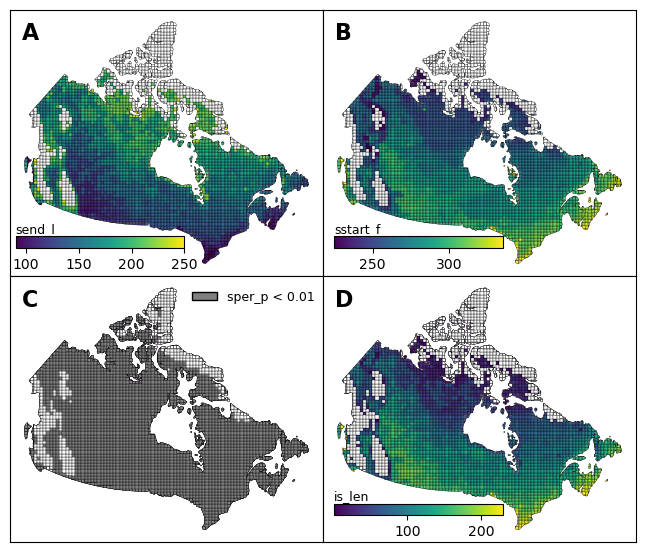

In [86]:
fig, axs = plt.subplots(2, 2, figsize = (7.5, 7.5 * 0.75)) # 3876 pixel width

cmap = 'viridis'

# A
axs[0, 0].text(-2400000, 3500000, 'A', fontsize = 16, weight = 'bold')

label = 'send_l'
range = [90, 250]

vutil.mapCanada(tiles, ax = axs[0, 0], form = 'vector', var = label, label = label, range = range, single_plot = False,
                vcon1 = tiles[tiles['send_l'].isna()], con1_col = 'white', con1_lab = 'Perennial Snow (No send_l)')

# handles = []
# con1_patch = mpatches.Patch(facecolor = 'white', edgecolor = 'black', label = ')')
# handles.append(con1_patch)
# plt.legend(handles = handles, loc = 'upper right')#, bbox_to_anchor = (-0.05, -2.5), fontsize = 9, frameon = False)

cbax = fig.add_axes([0.09, 0.55, 0.225, 0.02]) # Left, Bottom, Width, Height
sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = range[0], vmax = range[1]))
fig.colorbar(sm, cax = cbax, orientation = 'horizontal')
cbax.set_xlabel(label, labelpad = -35, loc = 'left', size = 9)

# B
axs[0, 1].text(-2400000, 3500000, 'B', fontsize = 16, weight = 'bold')

label = 'sstart_f'
range = [225, 335]

vutil.mapCanada(tiles, ax = axs[0, 1], form = 'vector', var = label, label = label, range = range, single_plot = False,
                vcon1 = tiles[tiles['sstart_f'].isna()], con1_col = 'white', con1_lab = 'Perennial Snow (No sstart_f)')

# handles = []
# con1_patch = mpatches.Patch(facecolor = 'white', edgecolor = 'black', label = 'Perennial Snow (no sstart_f)')
# handles.append(con1_patch)
# plt.legend(handles = handles, loc = 'upper right')#, bbox_to_anchor = (-0.05, -2.5), fontsize = 9, frameon = False)

cbax = fig.add_axes([0.515, 0.55, 0.225, 0.02]) # Left, Bottom, Width, Height
sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = range[0], vmax = range[1]))
fig.colorbar(sm, cax = cbax, orientation = 'horizontal')
cbax.set_xlabel(label, labelpad = -35, loc = 'left', size = 9)

# C
axs[1, 0].text(-2400000, 3500000, 'C', fontsize = 16, weight = 'bold')

label = 'sper_p'
range = [0, 0]

vutil.mapCanada(tiles, ax = axs[1, 0], form = 'vector', var = label, label = label, range = range, single_plot = False,
                vcon1 = tiles[tiles['sper_p'] >= 0.01], con1_col = 'white', con1_lab = 'Perennial Snow (sper_p >= 0.01)',
                vcon2 = tiles[tiles['sper_p'] < 0.01], con2_col = 'grey', con2_lab = 'Not Perennial Snow (sper_p < 0.01)')

handles = []
con1_patch = mpatches.Patch(facecolor = 'grey', edgecolor = 'black', label = 'sper_p < 0.01')
handles.append(con1_patch)
plt.legend(handles = handles, loc = 'upper right', bbox_to_anchor = (-0.05, -2.8), fontsize = 9, frameon = False)

# D
axs[1, 1].text(-2400000, 3500000, 'D', fontsize = 16, weight = 'bold')

label = 'is_len'
range = [1, 230]

vutil.mapCanada(tiles, ax = axs[1, 1], form = 'vector', var = label, label = label, range = range, single_plot = False,
                vcon1 = tiles[tiles['is_len'] == 0], con1_col = 'white', con1_lab = 'No implausible snow period')

# handles = []
# con1_patch = mpatches.Patch(facecolor = 'deepskyblue', edgecolor = 'black', label = 'Perennial Snow')
# handles.append(con1_patch)
# con2_patch = mpatches.Patch(facecolor = 'crimson', edgecolor = 'black', label = 'Snow Free')
# handles.append(con2_patch)
# plt.legend(handles = handles, loc = 'upper right', bbox_to_anchor = (3.7, 21.3), fontsize = 9, frameon = False)

cbax = fig.add_axes([0.515, 0.075, 0.225, 0.02]) # Left, Bottom, Width, Height
sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = range[0], vmax = range[1]))
fig.colorbar(sm, cax = cbax, orientation = 'horizontal')
cbax.set_xlabel(label, labelpad = -35, loc = 'left', size = 9)

plt.tight_layout(h_pad = 0, w_pad = -4.4)

plt.show()

#fig.get_figure().savefig('Figure A13.tif', dpi = 600, bbox_inches = 'tight', pil_kwargs = {'compression': 'tiff_lzw'})

# Annual snow-year boundary

C:\Users\mbonney\AppData\Local\Temp\ipykernel_6936\2072122969.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(h_pad = 0, w_pad = -4.4)


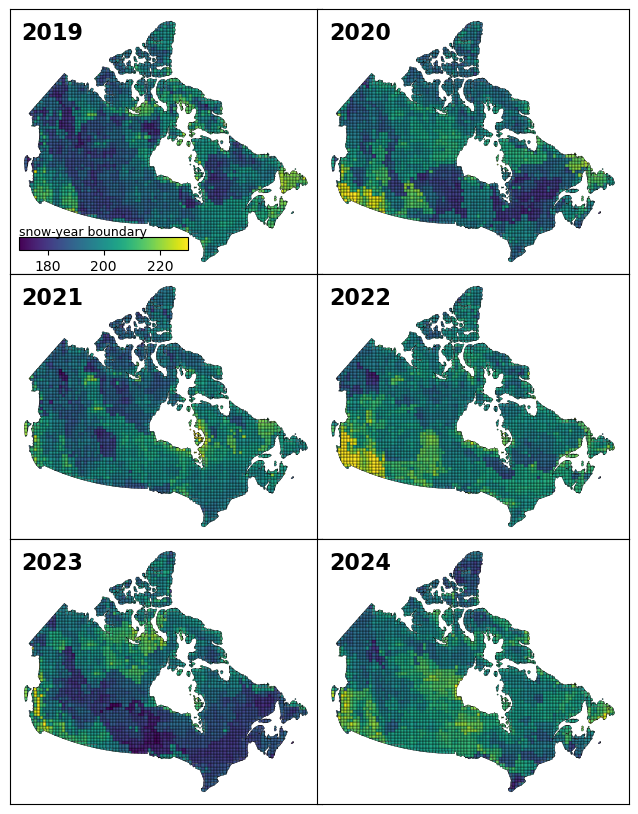

In [136]:
fig, axs = plt.subplots(3, 2, figsize = (7.5, 11 * 0.75)) # 3876 pixel width

cmap = 'viridis'
range = [170, 230]

# A
label = '2019'
axs[0, 0].text(-2400000, 3500000, label, fontsize = 16, weight = 'bold')

vutil.mapCanada(tiles, ax = axs[0, 0], form = 'vector', var = 'avg_19', label = label, range = range, single_plot = False)

cbax = fig.add_axes([0.1, 0.69, 0.225, 0.015]) # Left, Bottom, Width, Height
sm = plt.cm.ScalarMappable(cmap = cmap, norm = plt.Normalize(vmin = range[0], vmax = range[1]))
fig.colorbar(sm, cax = cbax, orientation = 'horizontal')
cbax.set_xlabel('snow-year boundary', labelpad = -35, loc = 'left', size = 9)

# B
label = '2020'
axs[0, 1].text(-2400000, 3500000, label, fontsize = 16, weight = 'bold')

vutil.mapCanada(tiles, ax = axs[0, 1], form = 'vector', var = 'avg_20', label = label, range = range, single_plot = False)

# C
label = '2021'
axs[1, 0].text(-2400000, 3500000, label, fontsize = 16, weight = 'bold')

vutil.mapCanada(tiles, ax = axs[1, 0], form = 'vector', var = 'avg_21', label = label, range = range, single_plot = False)

# D
label = '2022'
axs[1, 1].text(-2400000, 3500000, label, fontsize = 16, weight = 'bold')

vutil.mapCanada(tiles, ax = axs[1, 1], form = 'vector', var = 'avg_22', label = label, range = range, single_plot = False)

# E
label = '2023'
axs[2, 0].text(-2400000, 3500000, label, fontsize = 16, weight = 'bold')

vutil.mapCanada(tiles, ax = axs[2, 0], form = 'vector', var = 'avg_23', label = label, range = range, single_plot = False)

# F
label = '2024'
axs[2, 1].text(-2400000, 3500000, label, fontsize = 16, weight = 'bold')

vutil.mapCanada(tiles, ax = axs[2, 1], form = 'vector', var = 'avg_24', label = label, range = range, single_plot = False)

plt.tight_layout(h_pad = 0, w_pad = -4.4)
plt.show()

fig.get_figure().savefig('Figure A14.tif', dpi = 600, bbox_inches = 'tight', pil_kwargs = {'compression': 'tiff_lzw'})